In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

/Users/vanessah/opt/anaconda3/lib/python3.9/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
/Users/vanessah/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
dtype_dict = {'_id': 'str', 'Date': 'str', 'Zip Code': 'str', 'Model Year': 'str', 'Fuel': 'str', 'Make': 'str', 'Duty': 'str', 'Vehicles': 'float64'}

#Reading in the CSV files for every year
df_2019 = pd.read_csv('distribution_graph_data/2019_data.csv', dtype = dtype_dict)
df_2020 = pd.read_csv('distribution_graph_data/2020_data.csv', dtype = dtype_dict)
df_2021 = pd.read_csv('distribution_graph_data/2021_data.csv', dtype = dtype_dict)
df_2022 = pd.read_csv('distribution_graph_data/2022_data.csv', dtype = dtype_dict)
df_2023 = pd.read_csv('distribution_graph_data/2023_data.csv', dtype = dtype_dict)
df_2024 = pd.read_csv('distribution_graph_data/2024_data.csv', dtype = dtype_dict)

#Changing the name of the column to match the labeling of the column from the other years
df_2024.rename(columns={'ZIP Code': 'Zip Code'}, inplace = True)

#Merging all 6 dataframes
df = pd.concat([df_2019, df_2020, df_2021, df_2022, df_2023, df_2024])

#Changing the Date column to be a datetime object
df['Date'] = pd.to_datetime(df['Date'])
df['Year'] = df['Date'].dt.year

In [3]:
df

,_id,Date,Zip Code,Model Year,Fuel,Make,Duty,Vehicles,Year
0,1,2018-10-01,90000,2006,Gasoline,OTHER/UNK,Light,1.0,2018
1,2,2018-10-01,90000,2014,Gasoline,OTHER/UNK,Light,1.0,2018
2,3,2018-10-01,90000,2016,Gasoline,OTHER/UNK,Light,1.0,2018
3,4,2018-10-01,90000,2017,Gasoline,OTHER/UNK,Light,1.0,2018
4,5,2018-10-01,90000,<2006,Diesel and Diesel Hybrid,OTHER/UNK,Heavy,55.0,2018
...,...,...,...,...,...,...,...,...,...
499618,499619,2023-12-31,94611,2021,Battery Electric,VOLVO,Light,13.0,2023
499619,499620,2023-12-31,94005,2024,Plug-in Hybrid,OTHER/UNK,Light,1.0,2023
499620,499621,2023-12-31,95206,2017,Flex-Fuel,JEEP,Light,12.0,2023
499621,499622,2023-12-31,98372,2013,Gasoline,OTHER/UNK,Light,1.0,2023


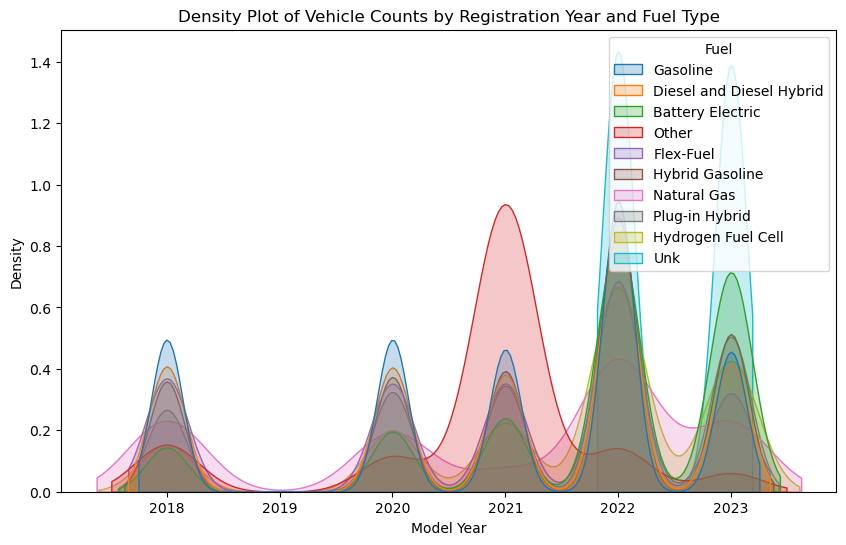

In [4]:
#Plotting the distribution of vehicles based on their fuel type of registration year
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df, x='Year', weights='Vehicles', hue='Fuel', fill=True, common_norm=False)
plt.title('Density Plot of Vehicle Counts by Registration Year and Fuel Type')
plt.xlabel('Model Year')
plt.ylabel('Density')
plt.show()

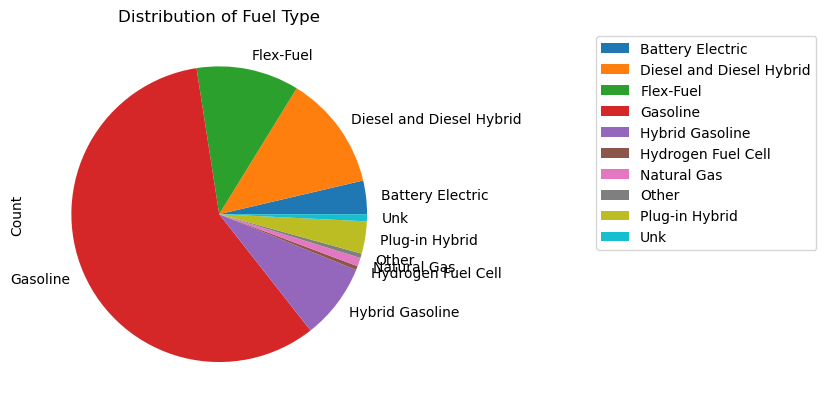

In [5]:
#Plot of distribution of fuel type from all 2018 to 2023
grouped_df = df.groupby('Fuel').count()
grouped_df.rename(columns={'_id': 'Count'}, inplace = True)
grouped_df = grouped_df[['Count']]

ax = grouped_df.plot.pie(y='Count')
plt.legend(bbox_to_anchor=(1.5, 1), loc='upper left');
plt.title('Distribution of Fuel Type');

In [7]:
#Getting the zip codes in SDGE service areas

#Converting the CSV files into dataframes
col_index = [i for i in range(29)] + [i for i in range(41, 50)] + [70, 71, 72]
sdge_areas = pd.read_csv('SDGE_service_list.csv', usecols=['ZipCode'])

sdge_zip_codes = [str(element) for element in sdge_areas['ZipCode'].unique()]
sdge_zip_codes

['91901',
 '91902',
 '91905',
 '91906',
 '91910',
 '91911',
 '91912',
 '91913',
 '91914',
 '91915',
 '91916',
 '91917',
 '91931',
 '91932',
 '91934',
 '91935',
 '91941',
 '91942',
 '91945',
 '91948',
 '91950',
 '91962',
 '91963',
 '91977',
 '91978',
 '91980',
 '92003',
 '92004',
 '92007',
 '92008',
 '92009',
 '92010',
 '92011',
 '92014',
 '92019',
 '92020',
 '92021',
 '92024',
 '92025',
 '92026',
 '92027',
 '92028',
 '92029',
 '92036',
 '92037',
 '92040',
 '92045',
 '92049',
 '92054',
 '92055',
 '92056',
 '92057',
 '92058',
 '92059',
 '92060',
 '92061',
 '92064',
 '92065',
 '92066',
 '92067',
 '92068',
 '92069',
 '92070',
 '92071',
 '92072',
 '92075',
 '92078',
 '92079',
 '92081',
 '92082',
 '92083',
 '92084',
 '92085',
 '92086',
 '92091',
 '92092',
 '92093',
 '92096',
 '92101',
 '92102',
 '92103',
 '92104',
 '92105',
 '92106',
 '92107',
 '92108',
 '92109',
 '92110',
 '92111',
 '92112',
 '92113',
 '92114',
 '92115',
 '92116',
 '92117',
 '92118',
 '92119',
 '92120',
 '92121',
 '92122',


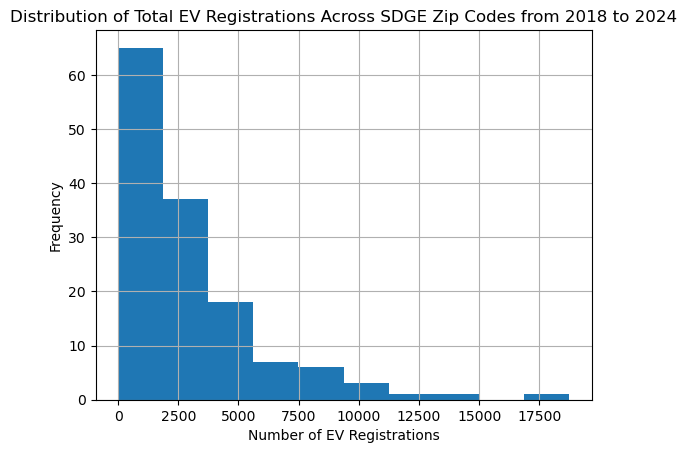

In [8]:
#Trying to see what the average EV registration rate is across all SDGE areas
sdge_df = df[df['Zip Code'].isin(sdge_zip_codes)]
ev_sdge = sdge_df[sdge_df['Fuel'] == 'Battery Electric']
grouped_ev_sdge = ev_sdge[['Zip Code', 'Vehicles']]
grouped_ev_sdge = grouped_ev_sdge.groupby('Zip Code').sum()
grouped_ev_sdge['Vehicles'].hist()
plt.title('Distribution of Total EV Registrations Across SDGE Zip Codes from 2018 to 2024')
plt.xlabel('Number of EV Registrations')
plt.ylabel('Frequency')
plt.show()

In [9]:
grouped_ev_sdge.sort_values(by='Vehicles')

#San Diego, which has the zip code 92130, has the highest number of EV registrations.

,Vehicles
Zip Code,
92199,1.0
92155,2.0
91948,2.0
92134,3.0
92145,6.0
...,...
92694,9757.0
92024,9944.0
92677,11928.0


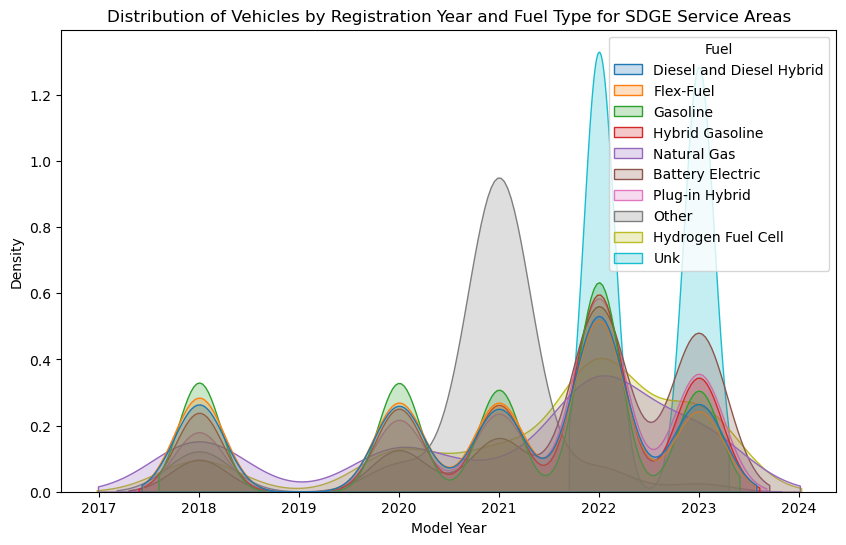

In [10]:
#Plot to see the distribution of vehicles based on their registration year and their fuel type. This plot only displays cars within SDGE areas.
plt.figure(figsize=(10, 6))
sns.kdeplot(data=sdge_df, x='Year', weights='Vehicles', hue='Fuel', fill=True, common_norm=False)
plt.title('Distribution of Vehicles by Registration Year and Fuel Type for SDGE Service Areas')
plt.xlabel('Model Year')
plt.ylabel('Density')
plt.show()

/var/folders/vx/n_j7yq3105g00_y8dx2xf70h0000gn/T/ipykernel_7219/2114380774.py:3: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=ev_sdge, x='Year', weights='Vehicles', hue='Make', fill=True, common_norm=False)


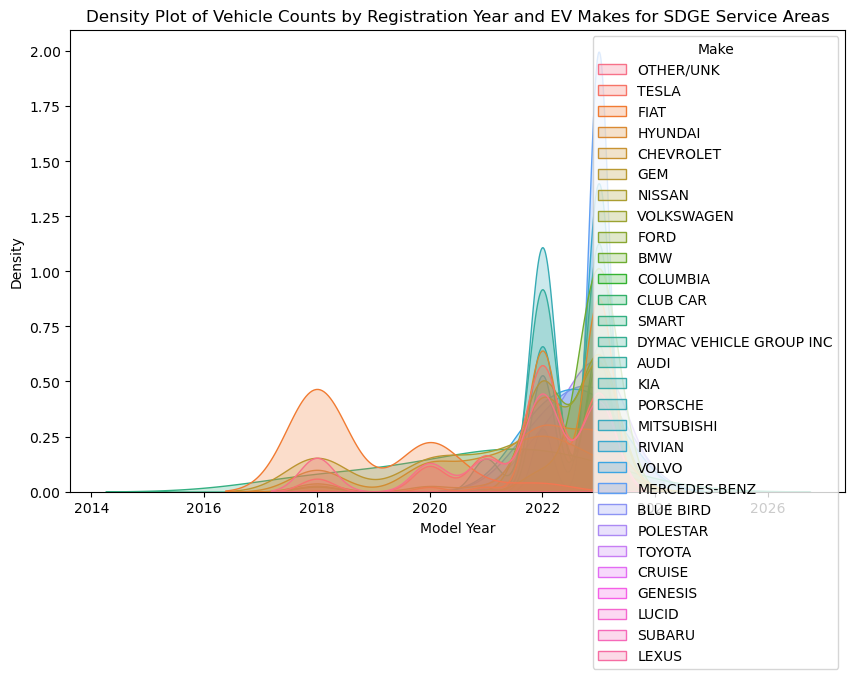

In [11]:
#Plot to see the distribution of EV models across SDGE areas
plt.figure(figsize=(10, 6))
sns.kdeplot(data=ev_sdge, x='Year', weights='Vehicles', hue='Make', fill=True, common_norm=False)
plt.title('Density Plot of Vehicle Counts by Registration Year and EV Makes for SDGE Service Areas')
plt.xlabel('Model Year')
plt.ylabel('Density')
plt.show()

/var/folders/vx/n_j7yq3105g00_y8dx2xf70h0000gn/T/ipykernel_7219/3998767446.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  make_df['is_tesla'] = np.where(make_df['Make'] == 'TESLA', 'Yes', 'No')


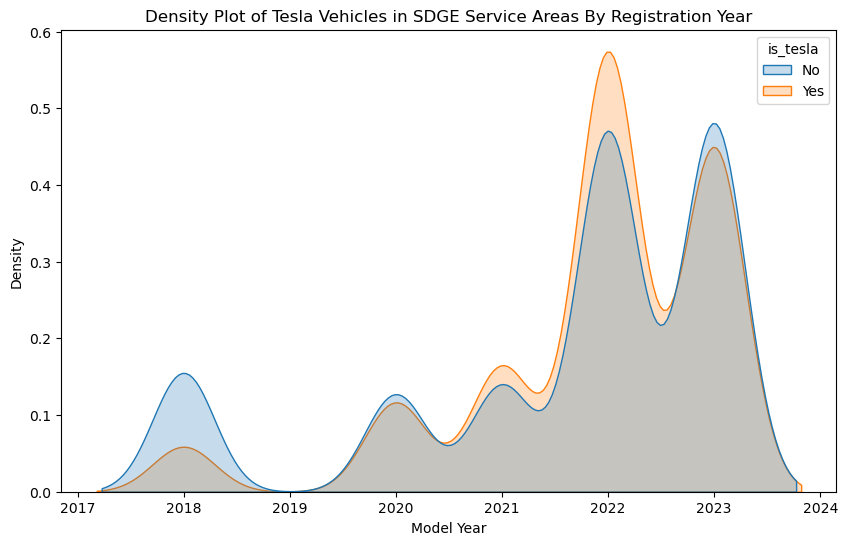

In [12]:
#Making a new column that displays whether the EV is from Tesla 
make_df = ev_sdge[['Make', 'Vehicles', 'Year']]
make_df['is_tesla'] = np.where(make_df['Make'] == 'TESLA', 'Yes', 'No')

#Plot to show how many Tesla vehicles are being registered compared to other EV models
plt.figure(figsize=(10, 6))
sns.kdeplot(data=make_df, x='Year', weights='Vehicles', hue='is_tesla', fill=True, common_norm=False)
plt.title('Density Plot of Tesla Vehicles in SDGE Service Areas By Registration Year')
plt.xlabel('Model Year')
plt.ylabel('Density')
plt.show()